In [4]:
'''
URJC / GIA / Aprendizaje Automático 1 / Curso 23-24
alfredo.cuesta@urjc.es
'''
import pandas as pd
import numpy as np
from sklearn.preprocessing import add_dummy_feature
from sklearn import linear_model
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(5,5)
np.set_printoptions(precision=2)
pd.set_option("display.precision", 4)



En el cuaderno anterior aprendimos a encontrar $\bf w^*$ mediante descenso de gradiente respecto de la pérdida.

En otras palabras, la **única regla** que imponemos para aprender el modelo es que los parámetros elegidos minimicen $\mathcal L \big( {\bf Y}, f({\bf X};{\bf w}) \big).$
# Regularización

La función de pérdida tiene la siguiente expresión general
$$
\mathcal L \big( {\bf Y}, f({\bf X};{\bf w}) \big),
$$
tal que
- $\bf Y$ es el _ground truth_
- $\bf X$ es el conjunto de datos de entrenamiento, después de haber sido convenientemente preprocesado
- $f({\bf X},{\bf w})$ es el modelo paramétrico, cuyo conjunto de parámetros es $\bf w$.

De este modo, la función de pérdida evalúa la discrepancia entre los valores del _ground truth_ y los valores estimados por el modelo.
La **regularización** consiste en AÑADIR más reglas.

Puesto que tanto $\bf X$ como $\bf Y$ vienen dados por el "cliente", lo único sobre lo que podemos imponer reglas es sobre los pesos. <br>
Es decir, en vez de viajar libremente por el espacio de $\bf w$  buscando el punto $\bf w^*$ donde se alcanza el mínimo de la pérdida, añadimos términos que restringen "el viaje".

De esta manera la función objetivo del problema de optimización se convierte en:
$$
\mathcal L \big( {\bf Y}, f({\bf X};{\bf w}) \big) +
\mathcal R \big( {\bf w} \big)
$$

Vamos a estudiar 3 métodos de regularización, todos ellos sobre el problema de regresión lineal:
- Lasso
- Ridge
- Elastic Net

## Regularización _Lasso_

Consiste en añadir el término
$$
\mathcal R_{L} = \alpha \sum\limits_{i=1}^{D} \vert w_i\vert
$$
a la función de pérdida; donde $\alpha\ge 0$ es un valor que elegimos nosotros para contralar su efecto.
- $\alpha \rightarrow 0:\quad$
  Obtenemos el mismo $\bf w^*$ que con la regresión lineal, es decir desaparece el término de regularización.
- $\alpha > 0:\quad$
  Algunos parámetros tenderán a ir hacia 0
- $\alpha \rightarrow \infty:~~$
  Todos los parámetros se anulan.

En definitiva, quitando los dos casos extremos, el efecto de este regularizador es lograr que haya menos parámetros, porque muchos de ellos tenderán hacia 0.

Comentarios:
>- Dado que la norma-1 de un vector $\bf w$ es
$$\Vert {\bf w} \Vert_1 = \sum\limits_{i=1}^{D} \vert w_i\vert$$ 
  a esta regularización también se le llama **Regularización L1**
- El nombre proviene de _Least Absolute Shrinkage and Selection Operator_, precisamente por la propiedad de seleccionar y reducir el número de parámetros.
- La clase `sklearn.linear_model.Lasso` implementa la pérdida con esta regularización para el modelo lineal.
<BR> También se puede usar en otros modelos que ofrecen la opción `penalty = "l1"`.

## Regularización _Ridge_

Consiste en añadir el término
$$
\mathcal R_{R} = \frac{\alpha}{2} \sum\limits_{i=1}^{D} ( w_i )^2
$$
a la función de pérdida; donde $\alpha\ge 0$ es un valor que elegimos nosotros para contralar su efecto.
- $\alpha \rightarrow 0:\quad$
  Obtenemos el mismo $\bf w^*$ que con la regresión lineal, es decir desaparece el término de regularización, igual que con _Lasso_,
- $\alpha > 0:\quad$
  Impide que los parámetros se separen mucho o que alguno crezca demasiado.<br>
- $\alpha \rightarrow \infty:~~$
  Todos los parámetros se anulan, igual que con _Lasso_.

En definitiva, quitando los dos casos extremos, el efecto de este regularizador es lograr que todos los parámtros tengan valores pequeños, pero no necesariamente nulos.

Comentarios:
>- Dado que la norma-2 al cuadrado de un vector $\bf w$ es
$$\Vert {\bf w} \Vert_2 = \frac{1}{2}\sum\limits_{i=1}^{D} ( w_i )^2$$
<BR> a esta regularización también se le llama **Regularización L2**
- El factor $1/2$ se añade para que al derivar el término el exponente se cancele con él.
- La clase `sklearn.linear_model.Ridge` implementa la pérdida con esta regularización para el modelo lineal.
<BR> También se puede usar en otros modelos que ofrecen la opción `penalty = "l2"`.

## Regularización _Elastic Net_
Consiste en añadir una combinación lineal de ambos
$$
\mathcal R_{E} = \alpha_1 \mathcal R_{L} + \alpha_2 \mathcal R_{R}
= \alpha_1 \Vert{\bf w}\Vert_1 + \frac{\alpha_2}{2} \Vert{\bf w}\Vert_2^2.
$$
Esta regularización causa un doble reducción de los parámetros: la que provoca Lasso y la de Ridge. Para tener más control y además una interpretación de $\alpha_1$ y $\alpha_2$ es más frecuente utilizar una combinación lineal convexa de ambos términos de regularización. Es decir:
$$
\mathcal R_{E} = \alpha \big( r \cdot \mathcal R_{L} + (1-r)  \cdot \mathcal R_{R} \big),
$$
donde $r$ es el porcentaje o ratio de regularización Lasso que aplicamos; y por tanto el porcentaje complementario hasta llegar a 100% es de regularización Ridge; y $\alpha$ es un multiplicador para dar más o menos peso al termino.

Comentarios:
>- La clase `sklearn.linear_model.ElasticNet` implementa la pérdida con esta regularización para el modelo lineal.
<BR> También se puede usar en otros modelos que ofrecen la opción `penalty = "elasticnet"`.

# Hiperparámetros

Con los términos de regularización aparece un término nuevo muy-muy importante: **hiperparámetro**.

Los parámetros son aquellos elementos que podemos utilizar para ajustar un modelo a un conjunto de datos supervisado, <br>
mientras que los **hiperparámetros** son aquellos elementos que se han añadido al modelo o al algoritmo para controlar la ejecución.

<u>Ejemplos</u>
>- En la regla de actualización de parámetros mediante descenso del gradiente aparecía el _learning rate_ $\eta$, que controlaba la velocidad a la que viajamos por el espacio de parámetros.
>- En los términos de regularización aparece $\alpha$ para dar más o menos peso al regularizador
>- En la regularización Elastic Net aparece $r$ para dar más o menos porcentaje a Lasso.

# Ejemplo 1

Rescatamos el ejemplo del cuaderno anterior para mostrar el efecto de la regularización en el contorno de la función de pérdida y por tanto en como el decesnso del gradiente hace viajar a $\bf w$ desde el punto inicial hasta que se detiene.

La tabla de datos es simplemente:
<table>
  <tr ALIGN=CENTER>
    <th>Ej.</th>
    <th>$x_1$</th>
    <th>$x_2$</th>
    <th>$y$</th>
  </tr>
  <tr ALIGN=CENTER>
    <td>#1</td>
    <td>$0.8$</td>
    <td>$1.2$</td>
    <td>$5.0$</td>
  </tr>
</table>

Ni la clase `F` ni la clase `GradientDescent` cambian ya que la regularización solo afecta a la pérdida, de modo que copiamos en la celda de abajo ambas.
Tampoco cambia sustancialmente el código para generar las imágenes, así que creamos dos funciones: `fig_loss_contour`, `fig_gradDescent_steps`.

In [5]:
#-- Clase del modelo
class F:
    def __init__(self, w):
        # conversión de lista a vector columna de numpy
        if isinstance(w, list):
            w = np.expand_dims(np.array(w), axis=1)
        if isinstance(w, np.ndarray):
            if len(w.shape)==1:
                w = np.expand_dims(w, axis=1)
        self.w = w

    def val(self, x):
        return np.matmul(self.w.T, x).ravel()

    def grad_w(self, x):
        return x

#-- Clase del decenso de gradiente
class GradientDescent:
    def __init__(self, loss, lr = 0.1, Niter = 10):
        self.loss = loss
        self.lr = lr
        self.Niter = Niter

    def update(self,x,ytrue):
        self.loss.F.w = self.loss.F.w - ( self.lr * self.loss.grad_w(x,ytrue) )

    def fit(self,x,ytrue):
        steps = [self.loss.F.w]
        for k in range(self.Niter):
            self.update(x,ytrue)
            steps.append(self.loss.F.w)
        return steps

#-- Funciones para generar figuras

def fig_loss_contour(fx, L, Ns=50, bounds=5, contour_levels = 30):
    from copy import deepcopy
    fun = deepcopy(fx) # Para asegurarse de que NO perdemos
    loss= deepcopy(L)  # ni el modelo ni la pérdida.
    loss.F = fun

    rangeW0 = np.linspace(-bounds/10, bounds, Ns)
    rangeW1 = np.linspace(-bounds/10, bounds, Ns)
    [WW0, WW1] = np.meshgrid(rangeW0, rangeW1)
    WW0 = np.expand_dims(WW0.ravel(), axis=0)
    WW1 = np.expand_dims(WW1.ravel(), axis=0)
    WW = np.vstack((WW0,WW1))

    L_values = np.zeros(WW.shape[1])
    for kc in range(WW.shape[1]):
        w_try = WW[:,kc]
        fun.w = w_try
        L_values[kc] = loss.val(x,ytrue)
    L_values = L_values.reshape(Ns,Ns)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
    contours = ax.contour(rangeW0, rangeW1, L_values,
                          contour_levels, cmap='jet', alpha=0.4)
    ax.clabel(contours)
    ax.set_xlabel('$w_1$', fontsize=20)
    ax.set_ylabel('$w_2$', fontsize=20)
    ax.set_title('Contorno de la función de pérdida', fontsize=16)
    return fig, ax

def fig_gradDescent_steps(fig, ax, steps):
      plt.figure(fig)
      #- pasos dados por el descenso del gradiente
      w_init = steps[0]
      ax.plot(w_init[0],w_init[1],'o')
      for ks, w_step in enumerate(steps):
          w_step = w_step.ravel()
          ax.plot(w_step[0],w_step[1],'kx', alpha=0.1)
          if ks < len(steps)-1:
              w_next = steps[ks+1].ravel()
              ax.arrow(w_step[0],w_step[1],
                      w_next[0]-w_step[0], w_next[1]-w_step[1],
                      width=.05, head_length=.05, alpha=0.3, color='r' )
      return fig, ax

Respecto a la pérdida:
- volvemos a utilizar `MSE`
- tenemos que añadir Lasso y Ridge y **también** sus gradientes

$$
\begin{align}
\nabla_{\bf w} \mathcal R_L &= \alpha_1
\left[  \text{Signo} (w_1), \text{Signo} (w_2), \ldots, \text{Signo} (w_D)   \right]^\top \\
\nabla_{\bf w} \mathcal R_R &= \alpha_2
\left[  w_1, w_2, \ldots, w_D  \right]^\top
\end{align}
$$

In [6]:
class regularized_MSE:
    def __init__(self, F, penalty='none', alpha=1):
        self.F = F
        self.penalty = penalty
        self.alpha   = alpha

    ## Métodos "públicos" ------

    def val(self, x, ytrue):
        if self.penalty == 'l1':
          regul = self.lasso_()
        elif self.penalty == 'l2':
          regul = self.ridge_()
        else:
          regul = 0
        return ( ytrue-self.F.val(x) )**2  +  regul

    def grad_w(self, x, ytrue):
        if self.penalty == 'l1':
          g_regul = self.grad_lasso_()
        elif self.penalty == 'l2':
          g_regul = self.grad_ridge_()
        else:
          g_regul = 0
        yhat = self.F.val(x)
        return 2*(yhat-ytrue)*self.F.grad_w(x) + g_regul

    ### Métodos "privados" ( añadidos )------

    #- regularización 'l1' (lasso)

    def lasso_(self):
        return self.alpha*np.sum(np.abs(self.F.w))

    def grad_lasso_(self):
        eps = 1e-10 #<-- para evitar problemas con el 0
        signs = np.sign(self.F.w +eps)
        return self.alpha*(signs)

    #- regularización 'l2' (ridge)

    def ridge_(self):
        return (self.alpha/2)*np.sum(self.F.w**2)

    def grad_ridge_(self):
        return self.alpha*(self.F.w)

Finalmente creamos los datos y el script de ejecución

w_star = 
 [[1.41]
 [2.12]]
y_hat = 3.675
perdida =  [6.63]
error = 1.32509


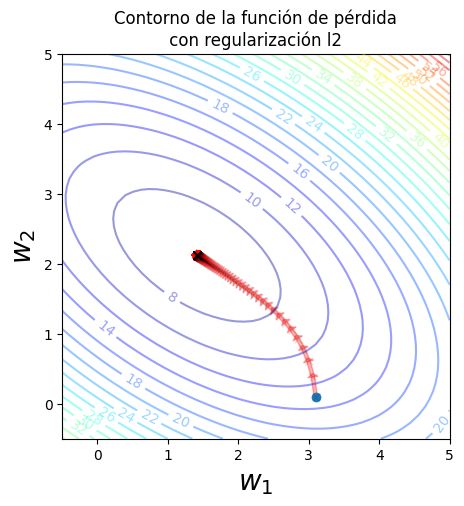

In [7]:
#- Datos
x  = [0.8, 1.2]
x  = np.expand_dims(np.array(x), axis=1)
ytrue = 5

#- Parámetros iniciales
w_init = [3.1,0.1]

#- modelo
fx = F(w_init)

#- pérdida
Rname = 'l2' #<-- { 'l1' , 'l2' }
alpha = 1.5
L = regularized_MSE(fx, penalty=Rname, alpha=alpha)

#- decenso de gradiente
learning_rate = 0.05
Niter = 500
GD = GradientDescent(L, lr=learning_rate, Niter=Niter)

#---- EJECUCIÓN y Resultado por pantalla ---
steps = GD.fit(x,ytrue)
print('w_star = \n',steps[-1])
print('y_hat = %.3f'%(fx.val(x)))
print('perdida = ',L.val(x,ytrue))
print('error = %.5f'%(ytrue-fx.val(x)) )

#-----Imagen------
fig, ax = fig_loss_contour(fx, L)
fig, ax = fig_gradDescent_steps(fig, ax, steps)
strTitle = ax.title.get_text() + f'\n con regularización {Rname} '
ax.set_title(strTitle)
plt.show()

# Ejemplo 2

En este ejemplo ajustamos un modelo lineal de regresión con todas las regularizaciones explicadas, utilizando la biblioteca Scikit-Learn.

Para ello volvemos a utilizar el código del cuaderno "07_modelos_lineales", pero encapsulando en funciones aquellas partes que serán prácticamente igual; esto es:
- generación del conjunto de datos
- crear figuras

Comenzamos con las funciones "viejas"

In [8]:
def generate_XY(N):
  m = np.random.rand()
  b = np.random.randint(5)
  X = np.linspace(0,10,N) + np.random.random(N)
  Y = m*X + b
  Y = Y + np.random.random(N)*2
  X = X.reshape(-1,1) #<- necesario para tener vectores columna
  Y = Y.reshape(-1,1) #<- necesario para tener vectores columna
  return X,Y


def make_printout(model):
  print(f'\nUtilizando {model.__str__()}')
  print(pd.DataFrame({'w_star': [model.intercept_, model.coef_]}, index=['intercept', 'coef']))
  return 0


def make_scatterplot(model, c='b', m='o'):
  x = np.linspace(0,10,30)
  plt.scatter(x, model.predict(x), c=c, m=m, s=40)
  return 0

def make_lineplot(model, c='b', s='-'):
  x = np.linspace(0,10,5).reshape(-1,1)
  plt.plot(x, model.predict(x), c, alpha=1, linestyle=s)
  return 0

A continuación creamos un script para:
0. Configurar el ejemplo
1. Crear el conjunto de datos
2. Probar todas las regularizaciones con un modelo de regresión lineal.



Utilizando LinearRegression()
                           w_star
intercept     [3.052803294532102]
coef       [[0.5815517485702234]]

Utilizando Lasso(alpha=0.2)
                         w_star
intercept  [3.1705739415860514]
coef       [0.5601516076178102]

Utilizando Ridge(alpha=10)
                           w_star
intercept     [3.215332252329021]
coef       [[0.5520185610340321]]

Utilizando ElasticNet()
                         w_star
intercept  [3.4948068789576987]
coef       [0.5012351395950974]


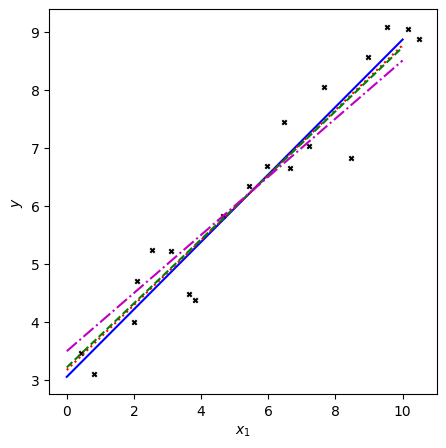

array([[ 0.43],
       [ 0.81],
       [ 2.01],
       [ 2.09],
       [ 2.54],
       [ 3.09],
       [ 3.63],
       [ 3.81],
       [ 4.66],
       [ 5.43],
       [ 5.95],
       [ 6.65],
       [ 6.46],
       [ 7.23],
       [ 7.67],
       [ 8.46],
       [ 8.97],
       [ 9.53],
       [10.16],
       [10.49]])

In [13]:
#- Configuración del ejemplo
N = 20
seed = 1460
np.random.seed(seed=seed)

#- Crear conjunto de datos
X, Y = generate_XY(N)

#- Instanciar los modelos lineales regularizados
linear = linear_model.LinearRegression()
lasso  = linear_model.Lasso(alpha=0.2)                   #<-| poner alphas
ridge  = linear_model.Ridge(alpha=10)                    #<-| diferentes para
elasnet= linear_model.ElasticNet(alpha=1., l1_ratio=0.5) #<-| ver su efecto

#- Probar modelos lineales regularizados
list_models = [linear, lasso, ridge, elasnet]
list_colors = ['b', 'r', 'g', 'm']
list_styles = ['-',':','--','-.']
list_markers = ['o', '*', '+', 'd'] #<- no lo uso
for model, c, s, m in zip(list_models, list_colors, list_styles, list_markers):
  #- ajustar el modelo
  model.fit(X,Y)
  #- mostrar modelo
  make_printout(model)
  #- pintar modelos
  make_lineplot(model, c=c, s=s)

plt.scatter(X,Y,c='k',s=10, marker = 'x')
plt.xlabel('$x_1$'); plt.ylabel('$y$')
plt.show()
X

# Ejercicios

Modificar el Ejemplo 1 para añadir también Elastic Net

Utilizando el conjunto de datos **california_housing**, que está en la carpeta *sample_data* de todo Google Colab se pide:
Aprender modelos de regresión para estimar el valor mediana de las casas.<br>
Es decir utilizar la columna *median_house_value* como valor objetivo de un problema de regresión lineal.<br>
Utiliza **california_housing_train.csv** para entrenar los modelos y **california_housing_test.csv** para testearlos.

Con el mismo conjunto de datos de antes, ahora queremos crear un modelo lineal para clasificación.
Para ello, en primer lugar se debe crear la etiqueta de cada ejemplo.
- Si *median_house_value* < 180000 entonces la etiqueta de ese ejemplo es 0
- En caso contrario la etiqueta es 1.
Utiliza `sklearn.linear_model.LogisticRegression` probando con las diferentes regularizaciones.

In [ ]:
#- cargar data set
folder_name = 'sample_data/'
file_name = 'california_housing_train.csv'
fullSet = pd.read_csv(folder_name+file_name)
N,D = fullSet.shape
print(f'{N} filas, {D} columnas')

#- comprobar si hay valores perdidos
missing_data = fullSet.isna()
missing_values_per_column = missing_data.sum(axis=0)
missing_values_per_row = missing_data.sum(axis=1)
print(f'{np.sum(missing_values_per_column)} valores perdidos')

#- separar el conjunto de entrenamiento en 2
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(fullSet, test_size=0.33, random_state=1460)
Y_train = X_train['median_house_value'].to_frame()
X_train.drop(['median_house_value'], axis=1, inplace=True)
Y_test = X_test['median_house_value'].to_frame()
X_test.drop(['median_house_value'], axis=1,  inplace=True)

#- Instanciar los modelos lineales regularizados
linear = linear_model.LinearRegression()
lasso  = linear_model.Lasso(alpha=0.2)                   #<-| poner alphas
ridge  = linear_model.Ridge(alpha=10)                    #<-| diferentes para
elasnet= linear_model.ElasticNet(alpha=1., l1_ratio=0.5) #<-| ver su efecto

#- Aprender modelos lineales regularizados
list_models = [linear, lasso, ridge, elasnet]
for model in list_models:
  #- ajustar el modelo
  model.fit(X_train,Y_train)

#- Testear los modelos aprendidos
for model in list_models:
  #- inferencia
  Y_test[model.__str__()] = model.predict(X_test)

17000 filas, 9 columnas
0 valores perdidos


In [ ]:
# cargar datos de iris
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris_data = load_iris()
bd = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
bd['species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)

In [ ]:
from sklearn.model_selection import train_test_split

df = bd.train_test_split

AttributeError: 'tuple' object has no attribute 'shape'